<a href="https://colab.research.google.com/github/KARENCMP82/Python/blob/main/DSC1124ESP_Actividad_DL_Grupo_XX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning
## Actividad 1: Deep Vision

Nombre alumn@ 1

Nombre alumn@ 2

...


# Actividad Deep Vision

Diseñar y comparar dos estrategias para la clasificación de imágenes en el dataset CIFAR100 de Keras (https://keras.io/api/datasets/cifar100/)

### **Estrategia 1: Red pre-entrenada**

La primera estrategia a comparar debe incluir la utilización de redes preentrenadas con el dataset ImageNet, llevando a cabo tareas de *transfer learning* y *fine-tuning* para clasificar los objetos de CIFAR100. Deben compararse al menos dos tipos de arquitecturas (VGGs, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, ResNet...) y se debe seleccionar la que mayor precisión nos dé (información sobre las arquitecturas disponibles en https://keras.io/applications/). Se espera que el ejercicio presente una profunda experimentación haciendo uso todas las técnicas de optimización mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (weight regularization, dropout, batch normalization, data augmentation, etc.).

### **Estrategia 2: Entrenar desde cero o from scratch**

La segunda estrategia a comparar será una red neuronal que se debe diseñar, entrenar y optimizar. Se requiere una justificación empírica de las decisiones que llevaron a la selección de atributos, capas e hiperparámetros a los que se ha llegado. Se espera que el ejercicio presente una profunda experimentación haciendo uso de todas las técnicas de optimización mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (weight regularization, dropout, batch normalization, data augmentation...).

## Normas a seguir

- Se debe entregar un **ÚNICO GOOGLE COLAB notebook** (archivo .ipynb) que incluya las instrucciones presentes y su **EJECUCIÓN!!!**. Debe aparecer todo el proceso seguido (carga de datos, visualización de datos, proceso de entrenamiento y proceso de validación del modelo).
- Poner el nombre del grupo en el nombre del archivo y el nombre de todos los integrantes del grupo al inicio del notebook.
- Las redes utilizadas deben estar entrenadas y con las métricas extraídas en el conjunto de test.
- Es recomendable crear una última sección de texto en el notebook en la que se discutan los diferentes modelos obtenidos y se extraigan las conclusiones pertinentes.

## Criterio de evaluación

- Seguimiento de las normas establecidas en la actividad.
- Efectividad al presentar las comparaciones entre métricas de evaluación de ambos modelos.
- Demostración de la utilización de técnicas de optimización para mejorar el rendimiento de los modelos.
- Modelos predictivos con rendimiento superior al aleatorio.
- Corrección en el uso de algoritmos, modelos y formas idiomáticas en Python.
- El código debe poder ejecutarse sin modificación alguna en Google Colaboratory.

Recomendaciones en el Uso de Colab:

- Eliminar las variables innecesarias para liberar RAM mediante la sentencia:

In [12]:
#LIBRERIAS
#Importar librerías esenciales (TensorFlow/Keras, NumPy, Matplotlib).
# Bibliotecas estándar
import random

# Bibliotecas científicas y de manejo de datos
import numpy as np
import h5py  # Para trabajar con archivos HDF5

# Visualización
import matplotlib.pyplot as plt

# Keras y TensorFlow
import keras as ks
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, Activation
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator



x_train: Son las imágenes que usarás para entrenar tu red neuronal. Es el conjunto de datos más grande, con el que el modelo "aprende".

y_train: Son las etiquetas correctas (números del 0 al 99 que representan cada categoría) correspondientes a cada imagen en x_train. Le dicen al modelo cuál es la respuesta correcta durante el entrenamiento.

x_test: Son las imágenes que usarás para probar qué tan bien ha aprendido tu modelo después de entrenarlo. El modelo no ve estas imágenes durante el entrenamiento.

y_test: Son las etiquetas correctas correspondientes a cada imagen en x_test. Las usas para comparar las predicciones del modelo en x_test y ver cuántas acierta.

In [13]:
# Cargar dataset: (x_train, y_train), (x_test, y_test) = cifar100.load_data().
print("[INFO]: Loading CIFAR-100 data...")
((x_train, y_train), (x_test, y_test)) = cifar100.load_data()
# Para verificar que se cargó correctamente, puedes imprimir las formas (shapes)
print("###########################")
print(f"Forma de x_train: {x_train.shape}")
print(f"Forma de y_train: {y_train.shape}")
print(f"Forma de x_test: {x_test.shape}")
print(f"Forma de y_test: {y_test.shape}")

[INFO]: Loading CIFAR-100 data...
###########################
Forma de x_train: (50000, 32, 32, 3)
Forma de y_train: (50000, 1)
Forma de x_test: (10000, 32, 32, 3)
Forma de y_test: (10000, 1)


In [8]:
#Definir los nombres de las clases (etiquetas finas):
# Nombres de las 100 clases "finas" de CIFAR-100
# Estos nombres están en el orden correspondiente a las etiquetas numéricas 0-99
arrayEtiqueta = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

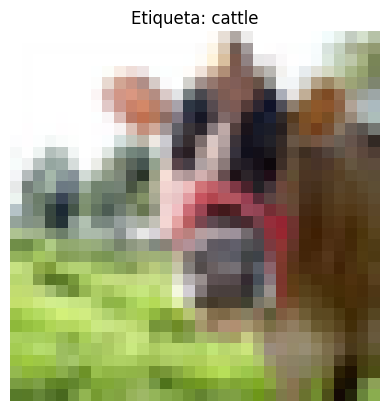

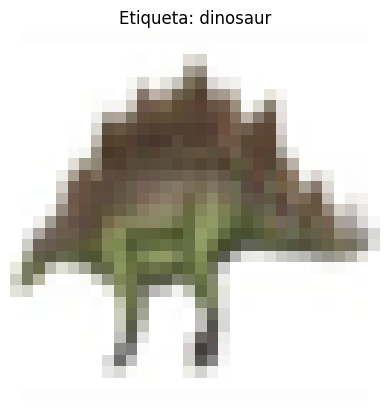

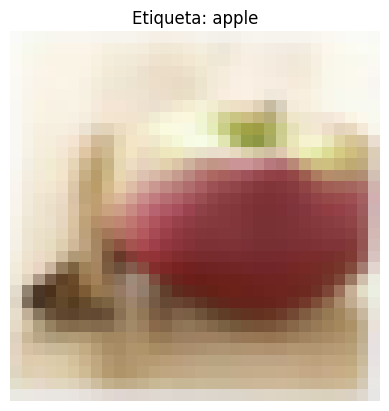

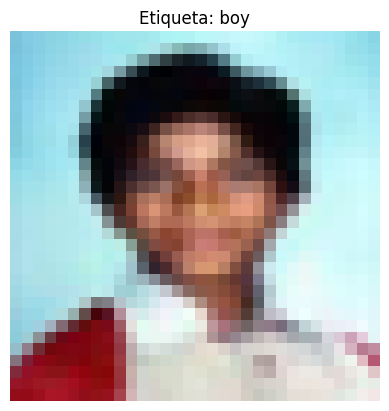

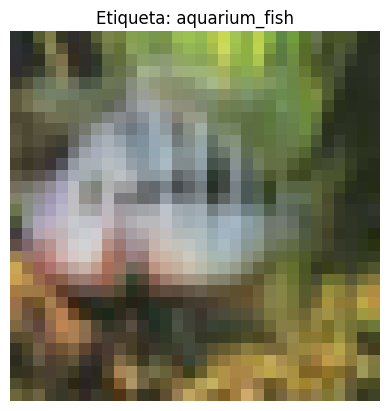

In [15]:
#Visualizar algunas imágenes y sus etiquetas para entender los datos.

# Cargar el dataset
(images_train, labels_train), (images_test, labels_test) = cifar100.load_data(label_mode='fine')


# Visualizar las primeras 5 imágenes del conjunto de entrenamiento


for i in range(5):
    plt.imshow(images_train[i])#Muestra la primera imagen
    plt.title(f"Etiqueta: {arrayEtiqueta[labels_train[i][0]]}")#Agrega un título a la imagen
    plt.axis('off')#Oculta los ejes
    plt.show()#Muestra Imagen



In [16]:
# Normalizar píxeles de imágenes (e.g., dividir por 255.0).


images_train = images_train.astype('float32') / 255.0
images_test = images_test.astype('float32') / 255.0


In [ ]:
#Convertir etiquetas y_train, y_test a one-hot encoding (to_categorical).

Estrategia 1: Red Pre-entrenada (Transfer Learning y Fine-tuning):
* Para cada arquitectura pre-entrenada a probar (al menos 2, e.g., VGG16 y ResNet50):
